# View Spectraction results

 work with Weakly_2022_09
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/18
- update : 2022/03/18


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/atmospec 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_09/conda/envs/lsst-scipipe-2.0.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/rapid_analysis 	setup


In [2]:
! eups list -s lsst_distrib

   g64fc59b30a+e1dba0a6f6 	w_latest w_2022_09 current setup


## imports

In [3]:
import lsst.daf.butler as dafButler

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [5]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

## Configuration

### Butler configuration

In [6]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

### Collection configuration

#### Give the collection

In [7]:
collection = "u/dagoret/first_test2"
datasetRefs = registry.queryDatasets(datasetType='spectraction', collections=collection, where= "instrument='LATISS'")

In [8]:
if True:
    all_ref_for_spectraction = []

    for i, ref in enumerate(datasetRefs):
        all_ref_for_spectraction.append(ref.dataId)
        print("fullId: ",ref.dataId.full)
        

fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit_system: 0, visit: 2021070700319}
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit_system: 0, visit: 2021070700320}


## Input selection

In [9]:
all_ref_for_spectraction 

[{instrument: 'LATISS', detector: 0, visit: 2021070700319, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700320, ...}]

In [10]:
refid0 = all_ref_for_spectraction[1]
refid0

{instrument: 'LATISS', detector: 0, visit: 2021070700320, ...}

## View postISRCCD

In [11]:
postisrccd = butler.get('postISRCCD', dataId={'exposure': refid0["visit"], 'instrument': 'LATISS', 'detector': 0}, collections = collection)

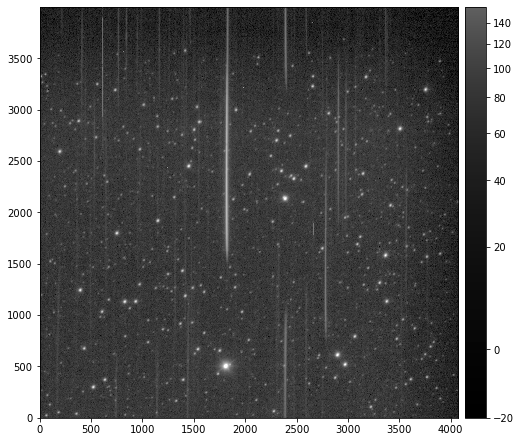

In [12]:
fig = plt.figure(figsize=(8,8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(postisrccd.image)
#plt.gca().axis('off')

## Access to Spectraction

In [13]:
spectraction  = butler.get('spectraction', dataId=refid0, collections = collection)

In [14]:
image = spectraction.image

In [15]:
img = image.data

In [16]:
#transform = AsinhStretch() + PercentileInterval(99.)
transform = PercentileInterval(98.)

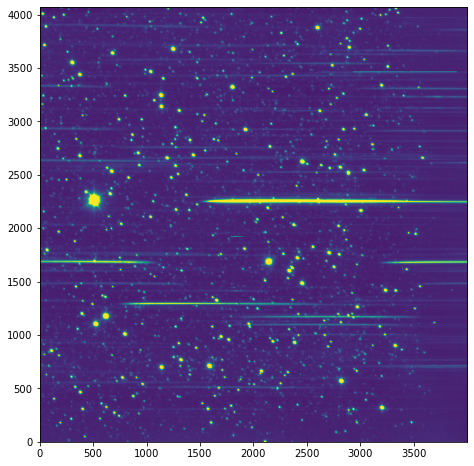

In [17]:
fig = plt.figure(figsize=(8,8))
plt.imshow(transform(img),origin="lower")
plt.show()

## Access to Spectrum

In [18]:
spectrum = spectraction.spectrum

In [19]:
spec    = spectrum.data
specerr =spectrum.err
wl      = spectrum.lambdas

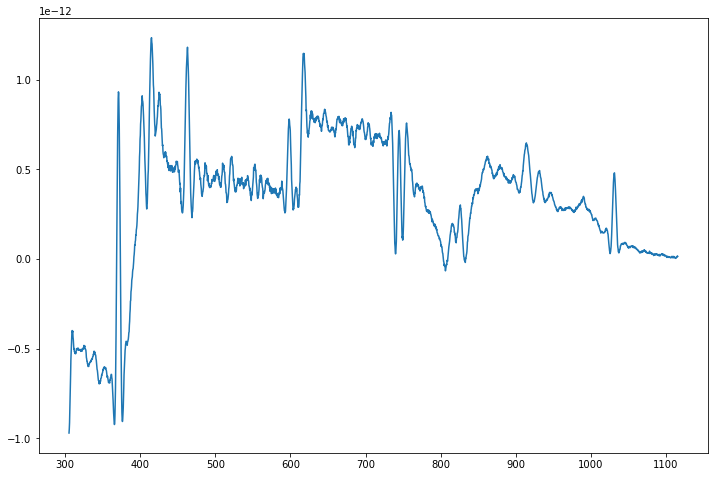

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(wl,spec)
plt.show()

## Access to Spectrogram

In [21]:
spectrogram=spectrum.spectrogram

In [22]:
spectrogramdata = spectrogram.data

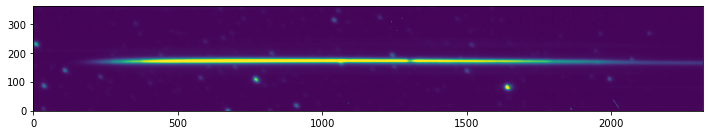

In [23]:
fig = plt.figure(figsize=(12,8))
plt.imshow(transform(spectrogramdata),origin="lower")
plt.show()